In [1]:
import pandas as pd
df=pd.read_csv("covid_19_data.csv")
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [6]:
#cleaning
df.rename(columns={'ObservationDate':'Date','Province/State':'State','Country/Region':'Country',},inplace=True)
df['Date']=pd.to_datetime(df['Date'])
df.isnull().sum()

Date             0
State        78103
Country          0
Confirmed        0
Deaths           0
Recovered        0
dtype: int64

In [10]:
#analyze
grouped=df.groupby(['Date','Country'])[['Confirmed','Deaths','Recovered']].sum().reset_index()
grouped.tail()

,Date,Country,Confirmed,Deaths,Recovered
87276,2021-05-29,Vietnam,6908.0,47.0,2896.0
87277,2021-05-29,West Bank and Gaza,307838.0,3492.0,300524.0
87278,2021-05-29,Yemen,6731.0,1319.0,3399.0
87279,2021-05-29,Zambia,94751.0,1276.0,91594.0
87280,2021-05-29,Zimbabwe,38933.0,1594.0,36578.0


In [14]:
#latestdata-filtering
latest_date=grouped['Date'].max()
latest=grouped[grouped['Date']==latest_date]
latest.head()

,Date,Country,Confirmed,Deaths,Recovered
87086,2021-05-29,Afghanistan,70111.0,2899.0,57281.0
87087,2021-05-29,Albania,132297.0,2449.0,129215.0
87088,2021-05-29,Algeria,128456.0,3460.0,89419.0
87089,2021-05-29,Andorra,13693.0,127.0,13416.0
87090,2021-05-29,Angola,34180.0,757.0,27646.0


In [30]:
#top 10 countries confirmed cases-sorting
top10=latest.sort_values(by='Confirmed',ascending=False).head(10)
print(top10.shape)


(10, 5)


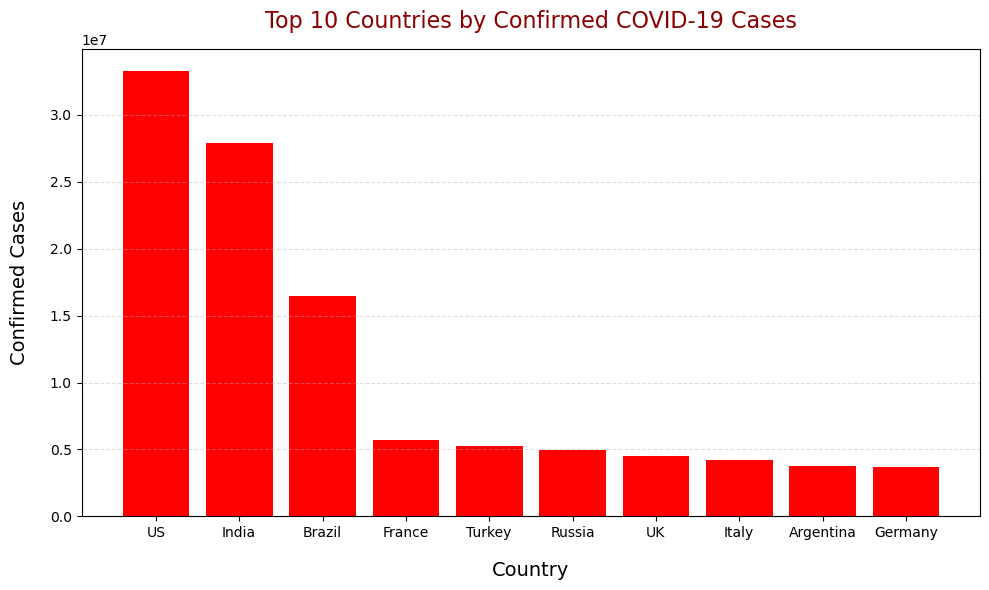

In [42]:
#top 10 countries by confirmed cases-plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(top10['Country'],top10['Confirmed'],color='red')
plt.title("Top 10 Countries by Confirmed COVID-19 Cases",fontsize=16,pad=15,color='darkred')
plt.xlabel('Country',fontsize=14,labelpad=15)
plt.ylabel('Confirmed Cases',fontsize=14,labelpad=15)
plt.grid(axis='y',linestyle='--',alpha=0.4)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

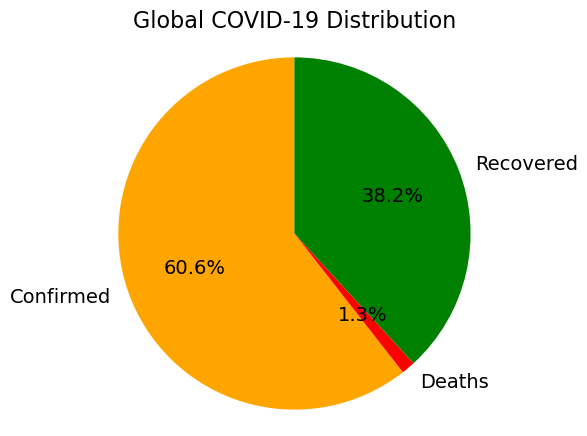

In [53]:
total_confirmed=latest['Confirmed'].sum()
total_deaths=latest['Deaths'].sum()
total_recovered=latest['Recovered'].sum()

import matplotlib.pyplot as plt
#data
labels=['Confirmed','Deaths','Recovered']
sizes=[total_confirmed,total_deaths,total_recovered]
colors=['orange','red','green']

#plot
plt.figure(figsize=(5,5))
plt.pie(sizes,labels=labels,colors=colors,autopct='%.1f%%',startangle=90,textprops={'fontsize':14}) 
plt.title('Global COVID-19 Distribution',fontsize=16,pad=10)
plt.axis('equal')
plt.show()
           

In [ ]:
#Conclusion
This project explores and visualizes global COVID-19 data using Python.
It demonstrates data cleaning, aggregation,and visualization skills using Pandas and Matplotlib.

**Key Insights:**
-Top 10 countries by confirmed cases
-Proportions of confirmed,recovered and death cases globally 

**Tools used**
-Python, Pandas, Matplotlib

**Techniques used**
-Data Cleaning: Handling Missing Values , renaming columns
-Data Aggregation: grouped and summed values by country and date
-Sorting and Filtering: Identified top 10 countries by confirmed cases
-Data visualization: Used bar and pie charts for extracting insights